In [ ]:
import os
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train.csv : train<br/>
test.csv : test<br/>
historical_transactions.csv : 기존 고객 3개월 트랜잭션<br/>
new_merchange_transactions.csv : 신규고객 2개월 트랜젝션<br/>
merchant.csv : <br/>

# Data Overview

In [6]:
input_dir = os.path.join('..', 'input')
file_csv = [file for file in os.listdir(input_dir) if file.endswith('.csv')]
print(file_csv)

['historical_transactions.csv', 'merchants.csv', 'new_merchant_transactions.csv', 'sample_submission.csv', 'train.csv', 'test.csv']


In [7]:
os.path.join(input_dir, 'historical_transactions.csv')

'../input/historical_transactions.csv'

In [8]:
transactions = pd.read_csv('../input/historical_transactions.csv')

In [9]:
transactions.tail(3)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
29112358,Y,C_ID_5c240d6e3c,3,N,0,A,278,M_ID_9cdcfe8673,0,-0.657740,2017-12-26 18:37:51,1.0,16,37
29112359,Y,C_ID_5c240d6e3c,331,N,0,A,514,M_ID_1a75f94f92,-1,0.770620,2017-11-24 14:18:15,1.0,16,9
29112360,Y,C_ID_5c240d6e3c,331,N,0,A,514,M_ID_1a75f94f92,-2,1.134411,2017-10-26 14:09:40,1.0,16,9


In [10]:
new_transactions = pd.read_csv('../input/new_merchant_transactions.csv')

In [11]:
new_transactions.tail(3)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
1963028,Y,C_ID_bd97b86450,69,N,1,B,278,M_ID_9a9ccb6544,1,-0.621031,2018-03-05 12:04:56,1.0,9,37
1963029,Y,C_ID_c0513fd84f,130,N,0,A,367,M_ID_40c28d596f,1,-0.656749,2018-03-09 14:47:05,3.0,7,16
1963030,Y,C_ID_a935410f8e,19,N,0,A,278,M_ID_d855771cd9,2,-0.739395,2018-04-11 07:59:46,1.0,9,37


In [12]:
merchants = pd.read_csv('../input/merchants.csv')

In [13]:
merchants.tail(3)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
334693,M_ID_f2045dd267,35,561,7,-0.057471,-0.057471,N,A,A,0.96,...,0.90,0.924769,6,0.74,0.750763,8,Y,160,21,5.0
334694,M_ID_9139332ccc,35,511,7,-0.057471,-0.057471,Y,A,A,0.94,...,0.82,0.783000,6,0.65,0.584000,12,Y,-1,-1,NaN
334695,M_ID_cd2c0b07e9,35,606,17,-0.057471,-0.057471,N,A,A,0.90,...,0.73,0.744417,6,0.53,0.540334,10,Y,69,9,1.0


In [14]:
train = pd.read_csv('../input/train.csv')

In [15]:
train.tail(3)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
201914,2017-08,C_ID_7666735b3d,4,3,0,0.093494
201915,2016-07,C_ID_73f5a0efd0,3,2,1,-4.676589
201916,2017-07,C_ID_92c9984c58,3,1,1,-1.859413


In [16]:
test = pd.read_csv('../input/test.csv')

In [17]:
test.tail(3)

,first_active_month,card_id,feature_1,feature_2,feature_3
123620,2016-09,C_ID_21d56d950c,5,1,1
123621,2017-06,C_ID_6c46fc5a9d,2,1,0
123622,2016-10,C_ID_87e7979a5f,5,1,1


In [18]:
test_id = train.card_id.values[0]
print('[*]id in transactions : {}'.format(transactions.query('card_id == @test_id').shape))
print('[*]id in new_transactions : {}'.format(new_transactions.query('card_id == @test_id').shape))

[*]id in transactions : (260, 14)
[*]id in new_transactions : (23, 14)


In [19]:
train_id_cnt = len(train.card_id.unique())
test_id_cnt = len(test.card_id.unique())
train_test_total_cnt = len(set(list(train.card_id.unique()) + list(test.card_id.unique())))
transactions_id_cnt = len(transactions.card_id.unique())
new_transactions_id_cnt = len(new_transactions.card_id.unique())

In [20]:
print('[*]train_id_cnt : {}'.format(train_id_cnt))
print('[*]test_id_cnt : {}'.format(test_id_cnt))
print('[*]train_test_total_cnt : {}'.format(train_test_total_cnt))
print('[*]transactions_id_cnt : {}'.format(transactions_id_cnt))
print('[*]new_transactions_id_cnt : {}'.format(new_transactions_id_cnt))

[*]train_id_cnt : 201917
[*]test_id_cnt : 123623
[*]train_test_total_cnt : 325540
[*]transactions_id_cnt : 325540
[*]new_transactions_id_cnt : 290001


In [21]:
del train, test, merchants, new_transactions, transactions

--> transactions 파일에는 모든 고객에 대한 정보가 있다<br/>
--> new_transactions 파일에는 일부 고객에 대한 정보가 있다

# train & test

In [220]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [221]:
train.head(3)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056


In [224]:
import datetime
train['first_active_year'] = train['first_active_month'].apply(lambda x: x[0:4])

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.58 µs


In [195]:
train.groupby(['first_active_year']).target.mean().sort_values()

first_active_year
2012   -1.243123
2013   -0.876205
2014   -0.768913
2015   -0.640495
2011   -0.588494
2016   -0.573808
2017   -0.277227
2018    0.171504
Name: target, dtype: float64

In [196]:
train.corr()

,feature_1,feature_2,feature_3,target
feature_1,1.000000,-0.130969,0.583092,-0.014251
feature_2,-0.130969,1.000000,0.060925,-0.006242
feature_3,0.583092,0.060925,1.000000,-0.008125
target,-0.014251,-0.006242,-0.008125,1.000000


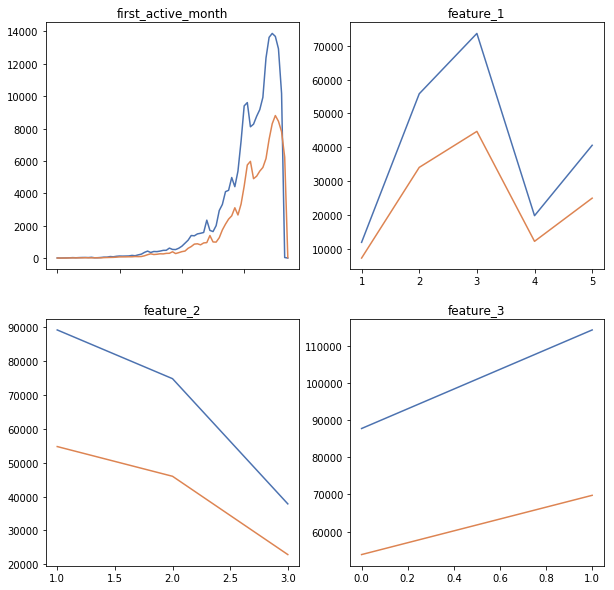

In [219]:
#train - first_Active_month
plt.figure(figsize=(10, 10))
idx = 1
for col in test.columns:
    if col=='card_id':
        continue
    fig = plt.subplot(2, 2, idx)
    train[col].value_counts().sort_index().plot()
    test[col].value_counts().sort_index().plot()
    fig.set_title(col)
    idx+=1

# Transactions.csv

In [19]:
transactions = pd.read_csv('../input/historical_transactions.csv')

In [20]:
## Pandas@reduce dataframe memory
def reduce_mem_usage(props, fillna=False, fillval=None):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object and props[col].dtype:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                if not fillna:
                    print('[*]skip {} cause of NA value'.format(col))
                    continue
                NAlist.append(col)
                props[col].fillna(fillval,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < pow(2, 8)-1:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < pow(2, 16)-1:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < pow(2, 32)-1:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist
#python #python/pandas
transactions, _ = reduce_mem_usage(transactions, fillna=True, fillval=-999)
train, _ = reduce_mem_usage(train, fillna=False, fillval=-999)

Memory usage of properties dataframe is : 3109.5357055664062  MB
******************************
Column:  city_id
dtype before:  int64
dtype after:  int16
******************************
******************************
Column:  installments
dtype before:  int64
dtype after:  int16
******************************
******************************
Column:  merchant_category_id
dtype before:  int64
dtype after:  int16
******************************
******************************
Column:  month_lag
dtype before:  int64
dtype after:  int8
******************************
******************************
Column:  purchase_amount
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  category_2
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  state_id
dtype before:  int64
dtype after:  int8
******************************
******************************
Column:  subsector_id
dtype 

In [21]:
transactions = pd.merge(transactions, train, on=['card_id'], how='left')

In [22]:
transactions = transactions[transactions.target.notnull()]

In [87]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18030009 entries, 400 to 29112360
Data columns (total 20 columns):
authorized_flag         object
card_id                 object
city_id                 int16
category_1              object
installments            int16
category_3              object
merchant_category_id    int16
merchant_id             object
month_lag               int8
purchase_amount         float32
purchase_date           object
category_2              uint8
state_id                int8
subsector_id            int8
first_active_month      object
feature_1               float64
feature_2               float64
feature_3               float64
target                  float32
first_active_year       object
dtypes: float32(2), float64(3), int16(3), int8(3), object(8), uint8(1)
memory usage: 1.9+ GB


In [24]:
transactions.head(3)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,first_active_month,feature_1,feature_2,feature_3,target,first_active_year
400,N,C_ID_5037ff576e,322,N,1,B,278,M_ID_b61c7d1be0,-3,-0.595260,2017-09-07 20:57:19,3,11,37,2017-01,5.0,1.0,1.0,-2.352713,2017
401,Y,C_ID_5037ff576e,138,N,1,B,307,M_ID_fe69229f24,-4,1.189469,2017-08-14 15:46:08,1,15,19,2017-01,5.0,1.0,1.0,-2.352713,2017
402,Y,C_ID_5037ff576e,138,N,1,B,705,M_ID_efc106141c,-9,-0.640069,2017-03-05 14:57:51,1,15,33,2017-01,5.0,1.0,1.0,-2.352713,2017


In [ ]:
category_3_dict = {'A': 1, 'B': 2, 'C': 3}
transactions.category_3 = transactions.category_3.map(category_3_dict)
category_1_dict = {'N': 0, 'Y': 1}
transactions.category_1 = transactions.category_1.map(category_1_dict)

In [107]:
transactions.corr()

,city_id,category_1,installments,category_3,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id,feature_1,feature_2,feature_3,target
city_id,1.000000,-0.347141,-0.044829,-0.112051,-0.109257,-0.029936,-0.000072,-0.333395,0.203310,0.056554,0.020469,0.033016,0.053918,0.014975
category_1,-0.347141,1.000000,0.128784,0.309803,0.240160,0.034965,-0.000113,0.856681,-0.504415,-0.188525,-0.020915,-0.102537,-0.093817,-0.038187
installments,-0.044829,0.128784,1.000000,0.340636,0.026687,0.003622,-0.000033,0.109516,-0.067030,-0.058362,-0.005239,-0.071618,-0.078461,-0.009836
category_3,-0.112051,0.309803,0.340636,1.000000,0.056393,0.036403,-0.000252,0.259234,-0.163156,-0.126179,-0.041022,-0.266730,-0.299585,-0.032911
merchant_category_id,-0.109257,0.240160,0.026687,0.056393,1.000000,0.039273,0.000129,0.192296,-0.139377,-0.004186,-0.030355,-0.006668,-0.015067,-0.007962
month_lag,-0.029936,0.034965,0.003622,0.036403,0.039273,1.000000,0.000059,0.034616,-0.035565,-0.001480,-0.049279,-0.051710,-0.050060,-0.018864
purchase_amount,-0.000072,-0.000113,-0.000033,-0.000252,0.000129,0.000059,1.000000,-0.000140,-0.000020,0.000169,-0.000004,-0.000250,0.000198,0.000019
category_2,-0.333395,0.856681,0.109516,0.259234,0.192296,0.034616,-0.000140,1.000000,-0.531341,-0.162511,-0.020733,-0.051894,-0.079407,-0.030748
state_id,0.203310,-0.504415,-0.067030,-0.163156,-0.139377,-0.035565,-0.000020,-0.531341,1.000000,0.105952,-0.001070,0.077484,0.039782,0.014498
subsector_id,0.056554,-0.188525,-0.058362,-0.126179,-0.004186,-0.001480,0.000169,-0.162511,0.105952,1.000000,-0.055062,0.015583,-0.016044,0.010059


Text(0.5, 1.0, 'target')

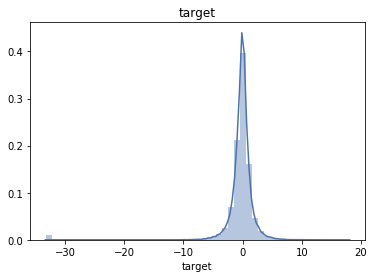

In [78]:
sns.distplot(transactions.target)
plt.title('target')

In [83]:
transactions['authorized_flag'].value_counts()

Y    16468145
N     1561864
Name: authorized_flag, dtype: int64

In [86]:
transactions.groupby(['authorized_flag']).target.mean()

authorized_flag
N   -0.677876
Y   -0.424164
Name: target, dtype: float32

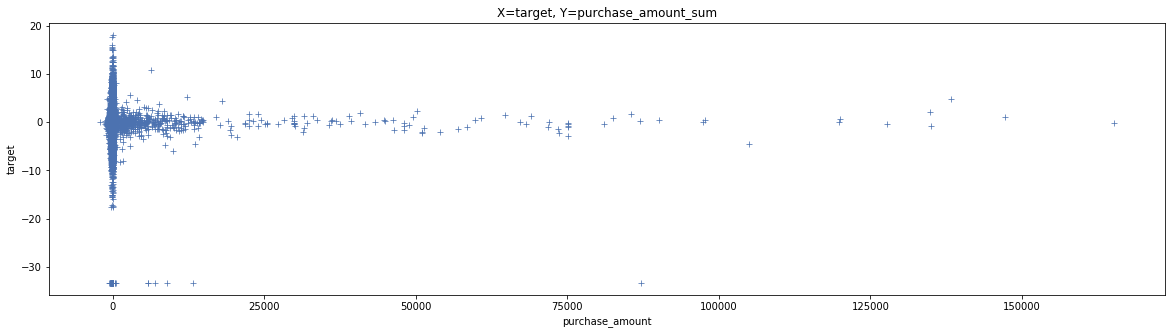

In [119]:
#target ~ purchase amount sum
test_df = transactions.groupby(['card_id']).aggregate({'purchase_amount':'sum', 'target':'mean'})
plt.figure(figsize=(20, 5))
plt.title('X=target, Y=purchase_amount_sum')
idx = test_df.purchase_amount < 1000000
sns.scatterplot(x='purchase_amount', y='target', data=test_df[idx], marker="+")

In [30]:
test_df.corr()

,target,purchase_amount
target,1.000000,0.000154
purchase_amount,0.000154,1.000000


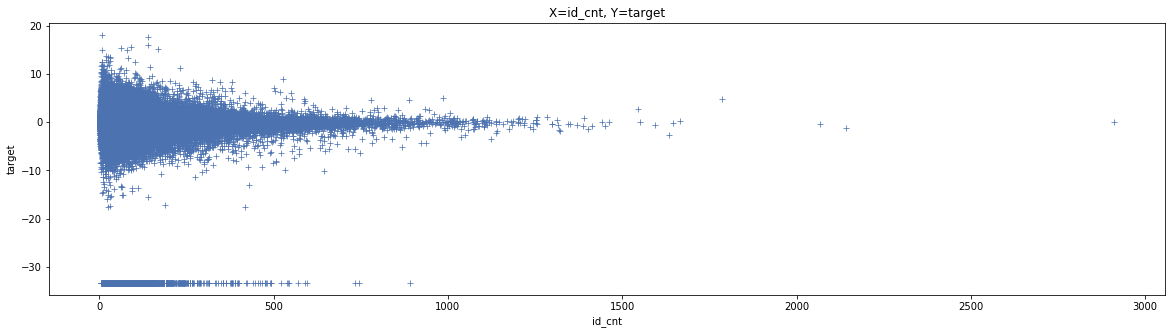

In [126]:
#target ~ purchase num
test_df = transactions[['card_id', 'target']].drop_duplicates()
test_df = pd.merge(test_df,
                   transactions['card_id'].value_counts().rename_axis('card_id').reset_index(name='id_cnt'),
                   on='card_id', how='left')
plt.figure(figsize=(20, 5))
plt.title('X=id_cnt, Y=target')
sns.scatterplot(x="id_cnt", y="target", data=test_df, marker="+")

In [33]:
test_df.corr()

,target,id_cnt
target,1.00000,-0.01164
id_cnt,-0.01164,1.00000


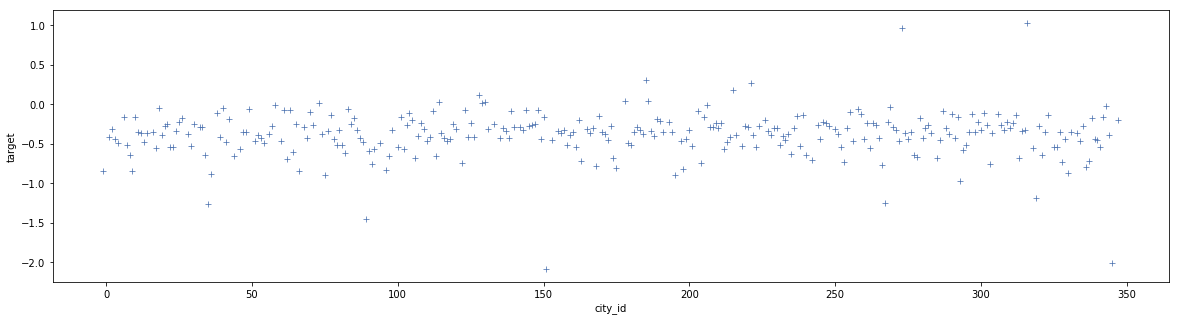

In [121]:
#target ~ city_id
plt.figure(figsize=(20, 5))
sns.scatterplot(x='city_id', y='target',
                data=transactions.groupby(['city_id']).target.mean().rename_axis('city_id').reset_index(name='target').sort_values(by='city_id'),
                marker="+")

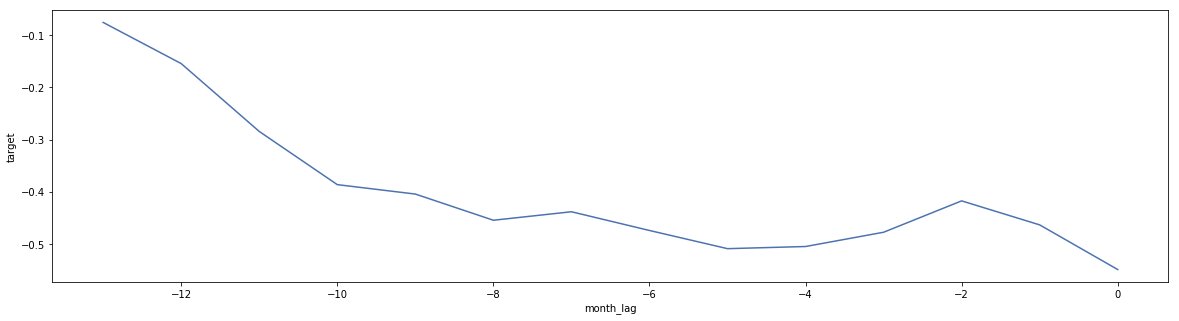

In [122]:
#month_lag ~ month lag
plt.figure(figsize=(20, 5))
sns.lineplot(x='month_lag', y='target',
            data=transactions.groupby(['month_lag']).target.mean().rename_axis('month_lag').reset_index(name='target').sort_values(by='month_lag'),
            )

Text(0.5, 1.0, 'X=first_active_month, Y=target')

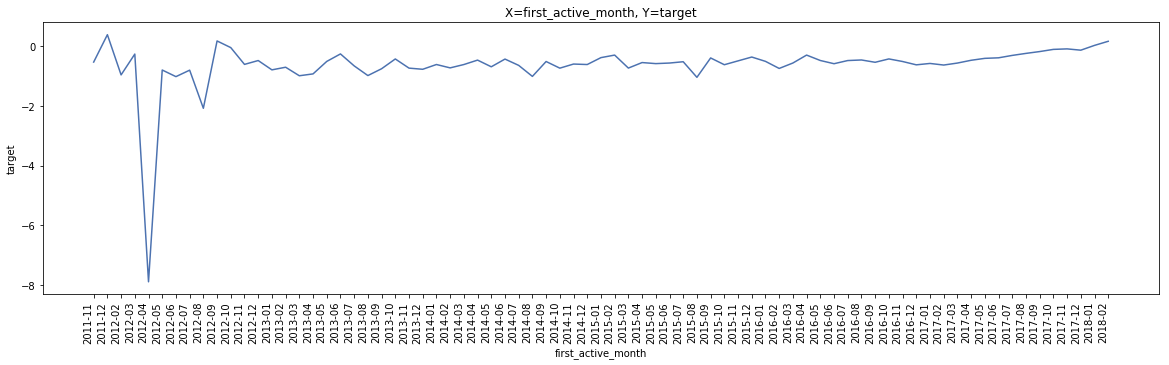

In [123]:
#target ~ active month
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90, ha='right')
sns.lineplot(x='first_active_month', y='target',
             data=transactions.groupby(['first_active_month']).target.mean()\
             .rename_axis('first_active_month')\
             .reset_index(name='target')\
             .sort_values(by='first_active_month'),
            )
plt.title('X=first_active_month, Y=target')

Text(0.5, 1.0, 'X=first_active_year, Y=target')

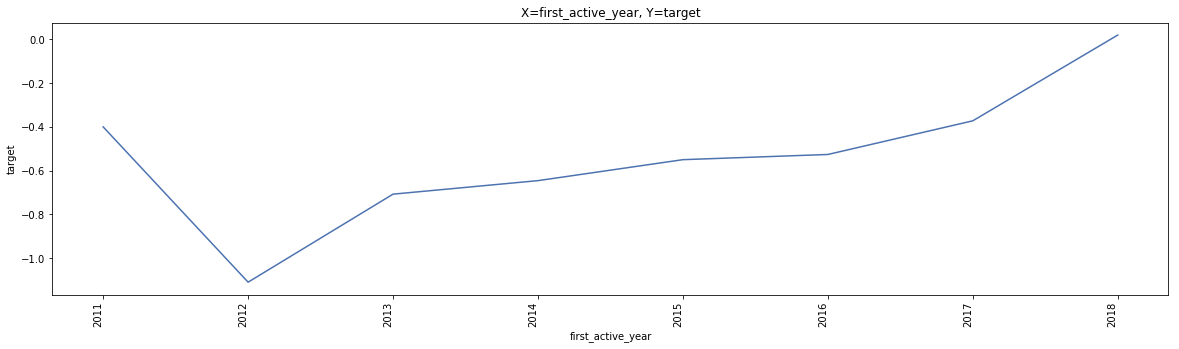

In [124]:
#target ~ active year
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90, ha='right')
sns.lineplot(x='first_active_year', y='target',
             data=transactions.groupby(['first_active_year']).target.mean()\
             .rename_axis('first_active_year')\
             .reset_index(name='target')\
             .sort_values(by='first_active_year'))
plt.title('X=first_active_year, Y=target')

In [ ]:
#target ~ purchase_date - first_active
transactions.purchase_date = pd.to_datetime(transactions.purchase_date, format='%Y-%m-%d %H:%M:%S')
transactions.first_active_month = pd.to_datetime(transactions.first_active_month, format='%Y-%m')
transactions.purchase_interval = transactions.purchase_date - transactions.first_active_month 
transactions['purchase_interval'] = transactions.purchase_interval.apply(lambda x: x.days)
test_df = transactions.groupby(['card_id']).aggregate({'purchase_interval': 'mean', 'target': 'mean'})

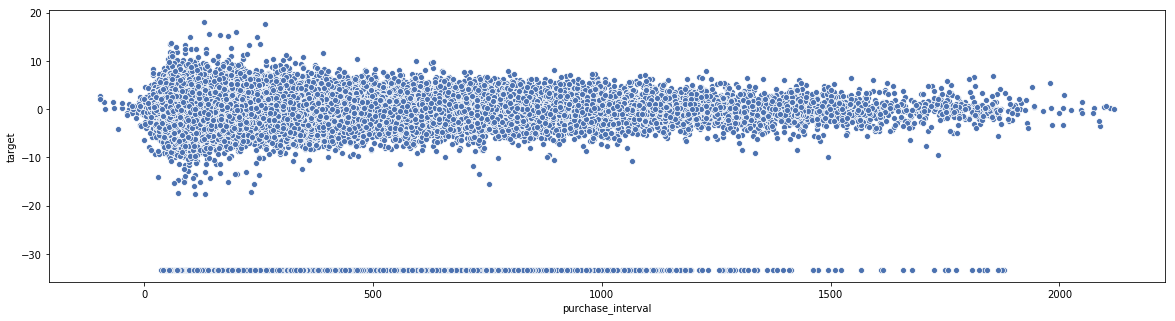

In [191]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x='purchase_interval', y='target', data=test_df)